In [50]:
import numpy
#copied from the matlab by falsy winchnet.
#Emperical Fourier Decomposition technique

def segm_tec(f, N):
    locmax = numpy.zeros((f.size))
    for i in range(1, len(f) - 1):
        if ((f[i - 1] <= f[i]) and (f[i] > f[i + 1])):
            if (f[i] > 0):  # a value below 0 or 0 is not a maxima!
                locmax[i] = f[i]

    desc_sort_index = numpy.argsort(locmax)[::-1]
    desc_sort_bool = numpy.empty(desc_sort_index.shape[0], dtype=bool)
    for i in range(desc_sort_index.size):
        if locmax[i] > 0:
            desc_sort_bool[i] = True

    desc_sort_index = desc_sort_index[desc_sort_bool]

    if N != 0:  # keep the N-th highest maxima and their index
        if len(desc_sort_index) > N:
            desc_sort_index = desc_sort_index[0:N + 1]
        else:
            N = desc_sort_index.size
        desc_sort_index = numpy.sort(desc_sort_index)  # gotta sort them again
        bounds = numpy.empty(N+2, dtype=int)
        bounds[0] = 0
        bounds[1] = (numpy.argmin(f[0:desc_sort_index[0]]))  # -2
        for i in range(N - 2):
            bounds[i+2] = (desc_sort_index[i] + numpy.argmin(f[desc_sort_index[i]:desc_sort_index[i+1]]) - 1)
        bounds[-2] = (desc_sort_index[N] + numpy.argmin(f[desc_sort_index[N]:len(f)]) - 1)
        bounds[-1] = f.size
        cerf = desc_sort_index * numpy.pi / round(len(f))
    return numpy.asarray(bounds), cerf


#https://arxiv.org/pdf/2009.08047v2.pdf
def EFD(x: list[numpy.float64], N: int):
    #we will now implement the Empirical Fourier Decomposition
    x = numpy.asarray(x,dtype=numpy.float64)
    
    ff = numpy.fft.fft(x)
    #extract the boundaries of Fourier segments
    bounds,cerf = segm_tec(abs(ff[0:round(ff.size/2)]),N)
    print(bounds)
    # truncate the boundaries to [0,pi]
    bounds = bounds*numpy.pi/round(len(ff)/2)
    
    # extend the signal by miroring to deal with the boundaries
    l = round(len(x)/2)
    z = numpy.lib.pad(x,((round(len(x)/2)),round(len(x)/2)),'symmetric')
    
    ff = numpy.fft.fft(z)
    # obtain the boundaries in the extend f
    bound2 = numpy.ceil(bounds*round(len(ff)/2)/numpy.pi).astype(dtype=int)
    efd = numpy.zeros(((len(bound2)-1,len(x))),dtype=numpy.float64)
    ft = numpy.zeros((efd.shape[0],len(ff)),dtype=numpy.cdouble)
    # define an ideal functions and extract components
    for k in range(efd.shape[0]): 
        if bound2[k] == 0:
            ft[k,0:bound2[k+1]] = ff[0:bound2[k+1]]
            #ft[k,len(ff)+1-bound2[k+1]:len(ff)] = ff[len(ff)+1-bound2[k+1]:len(ff)]
            ft[k,-bound2[k+1]:len(ff)] = ff[-bound2[k+1]:len(ff)]

        else:
            ft[k,bound2[k]:bound2[k+1]] = ff[bound2[k]:bound2[k+1]]
            #ft[k,len(ff)+1-bound2[k+1]:len(ff)+1-bound2[k]] = ff[len(ff)+1-bound2[k+1]:len(ff)+1-bound2[k]]

            ft[k,-bound2[k+1]:-bound2[k]] = ff[-bound2[k+1]:-bound2[k]]
        rx =  numpy.real(numpy.fft.ifft(ft[k,:]))
        efd[k,:] = rx[l:-l]


    return efd,cerf,bounds

[  0  15  61 109 118 773 793]


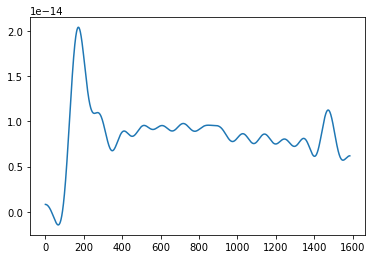

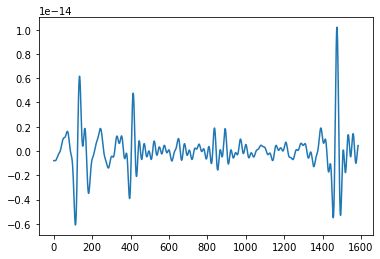

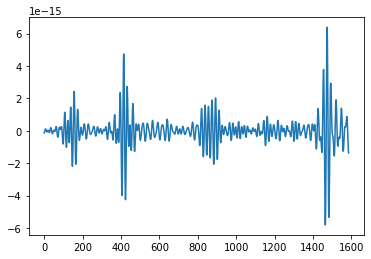

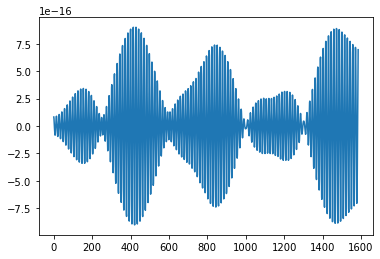

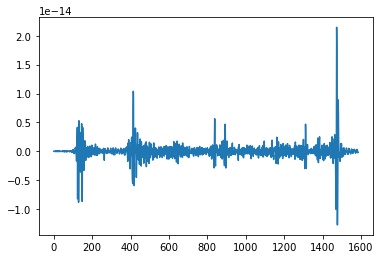

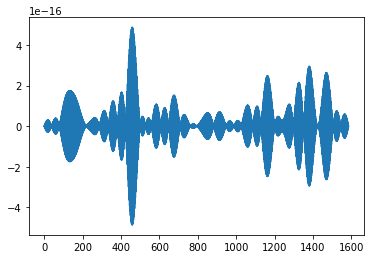

<Figure size 432x288 with 0 Axes>

0.0
1586


In [51]:
arp256clean = [1.400699999999999689e-22, 1.821100000000000012e-22, 2.159400000000000123e-22, 2.644499999999999981e-22, 3.291099999999999715e-22, 5.027400000000000143e-22, 7.117699999999999467e-22, 9.491600000000000001e-22, 2.974000000000000146e-21, 3.920499999999999489e-21, 4.429299999999999341e-21, 4.746100000000001336e-21, 5.589099999999999770e-21, 6.446699999999999129e-21, 7.150599999999998916e-21, 9.127199999999996874e-21, 1.060100000000000063e-20, 2.090900000000000151e-20, 4.021100000000000288e-20, 4.746100000000000884e-20, 5.627800000000000640e-20, 6.657899999999999255e-20, 7.504800000000000118e-20, 8.817399999999999686e-20, 1.017000000000000178e-19, 1.133300000000000212e-19, 1.298200000000000101e-19, 1.430000000000000046e-19, 1.528800000000000100e-19, 1.731200000000000031e-19, 2.010700000000000161e-19, 2.199600000000000125e-19, 2.456599999999999990e-19, 2.743700000000000180e-19, 2.967200000000000378e-19, 3.253400000000000345e-19, 3.893500000000000217e-19, 4.279000000000000015e-19, 4.542999999999999631e-19, 4.992800000000000504e-19, 7.750700000000000289e-19, 1.337599999999999916e-18, 1.743200000000000092e-18, 1.775600000000000012e-18, 1.964899999999999845e-18, 1.735199999999999826e-18, 2.052799999999999970e-18, 2.209699999999999882e-18, 2.297899999999999921e-18, 2.378699999999999908e-18, 2.462299999999999987e-18, 2.548799999999999873e-18, 2.537100000000000159e-18, 2.681300000000000131e-18, 2.699900000000000171e-18, 2.846700000000000037e-18, 3.057299999999999902e-18, 3.194000000000000107e-18, 3.306299999999999887e-18, 3.406700000000000138e-18, 3.502199999999999746e-18, 3.608600000000000196e-18, 3.684200000000000010e-18, 3.650400000000000236e-18, 3.822399999999999783e-18, 3.902499999999999842e-18, 3.947700000000000187e-18, 3.965899999999999828e-18, 3.984199999999999954e-18, 4.048900000000000080e-18, 4.067599999999999834e-18, 4.076999999999999953e-18, 4.105300000000000026e-18, 4.143199999999999647e-18, 4.143199999999999647e-18, 4.210599999999999766e-18, 4.757100000000001442e-18, 8.420500000000000762e-18, 8.696399999999999424e-18, 9.064400000000000856e-18, 8.858100000000000652e-18, 1.138500000000000066e-17, 1.316299999999999844e-17, 1.470099999999999904e-17, 1.426699999999999966e-17, 1.715300000000000418e-17, 1.787900000000000170e-17, 2.071800000000000023e-17, 2.373199999999999975e-17, 2.572399999999999963e-17, 2.638400000000000074e-17, 2.994599999999999766e-17, 3.201400000000000237e-17, 3.414600000000000304e-17, 3.510300000000000804e-17, 3.534600000000000282e-17, 4.449799999999999850e-17, 4.328499999999999732e-17, 5.180099999999999731e-17, 5.436799999999999913e-17, 5.679899999999998874e-17, 6.417099999999999543e-17, 6.860200000000000521e-17, 7.333999999999999956e-17, 8.004599999999999454e-17, 8.676399999999999839e-17, 9.106299999999997220e-17, 9.557400000000000004e-17, 9.961899999999999971e-17, 1.094800000000000060e-16, 9.491600000000000247e-17, 1.170399999999999997e-16, 1.219900000000000111e-16, 1.313200000000000069e-16, 1.413599999999999935e-16, 1.535799999999999978e-16, 1.623099999999999938e-16, 1.649499999999999982e-16, 2.566499999999999894e-16, 1.796099999999999741e-15, 4.095800000000000014e-15, 8.228899999999999273e-15, 1.162399999999999956e-14, 1.381500000000000065e-14, 2.513900000000000085e-15, 1.307199999999999942e-14, 1.319299999999999803e-14, 1.783799999999999995e-14, 1.672399999999999960e-14, 6.766100000000000826e-15, 1.228400000000000003e-14, 2.219899999999999962e-14, 2.174399999999999992e-14, 1.792000000000000089e-14, 2.090899999999999956e-14, 1.715300000000000085e-14, 2.174399999999999992e-14, 2.048000000000000147e-14, 1.987600000000000033e-14, 1.787899999999999884e-14, 2.189500000000000099e-14, 2.001400000000000060e-14, 2.100600000000000094e-14, 2.164399999999999908e-14, 1.557199999999999981e-14, 2.124900000000000114e-14, 1.608199999999999903e-14, 1.183999999999999991e-14, 6.876099999999999852e-15, 1.490500000000000061e-14, 2.115099999999999994e-14, 2.261200000000000061e-14, 2.174400000000000307e-14, 1.955900000000000090e-14, 2.319199999999999978e-14, 2.367800000000000018e-14, 1.942400000000000008e-14, 1.969399999999999855e-14, 2.324599999999999947e-14, 2.209699999999999914e-14, 2.010699999999999955e-14, 2.271600000000000072e-14, 2.219899999999999962e-14, 2.033899999999999858e-14, 2.081300000000000116e-14, 2.100600000000000094e-14, 1.804400000000000054e-14, 1.889500000000000115e-14, 1.964900000000000039e-14, 1.978500000000000102e-14, 1.992200000000000147e-14, 2.062200000000000417e-14, 2.062200000000000101e-14, 2.015300000000000069e-14, 1.889500000000000115e-14, 1.889500000000000115e-14, 1.889500000000000115e-14, 1.898200000000000118e-14, 1.792000000000000404e-14, 1.619299999999999787e-14, 1.703500000000000011e-14, 1.699600000000000086e-14, 1.504300000000000403e-14, 1.575199999999999879e-14, 1.507800000000000086e-14, 1.560799999999999961e-14, 1.645699999999999427e-14, 1.684000000000000069e-14, 1.707399999999999937e-14, 1.680100000000000144e-14, 1.680100000000000144e-14, 1.619300000000000103e-14, 1.699600000000000086e-14, 1.703500000000000011e-14, 1.619299999999999787e-14, 1.723199999999999917e-14, 1.615600000000000141e-14, 1.727200000000000140e-14, 1.755300000000000104e-14, 1.672399999999999960e-14, 1.611899999999999864e-14, 1.535800000000000383e-14, 1.525200000000000092e-14, 1.600799999999999980e-14, 1.557199999999999981e-14, 1.626800000000000008e-14, 1.528800000000000072e-14, 1.535799999999999752e-14, 1.557199999999999981e-14, 1.619300000000000103e-14, 1.619300000000000103e-14, 1.494000000000000059e-14, 1.535800000000000067e-14, 1.483700000000000029e-14, 1.375099999999999961e-14, 1.362500000000000032e-14, 1.397500000000000167e-14, 1.490500000000000061e-14, 1.365699999999999926e-14, 1.295200000000000062e-14, 1.387800000000000029e-14, 1.322300000000000049e-14, 1.289300000000000026e-14, 1.343799999999999945e-14, 1.384599999999999977e-14, 1.286299999999999938e-14, 1.387800000000000029e-14, 1.429999999999999965e-14, 1.349999999999999770e-14, 1.316300000000000031e-14, 1.353099999999999998e-14, 1.322300000000000049e-14, 1.378300000000000013e-14, 1.292199999999999974e-14, 1.322300000000000049e-14, 1.271600000000000073e-14, 1.289300000000000184e-14, 1.356300000000000050e-14, 1.274500000000000022e-14, 1.322300000000000049e-14, 1.254099999999999927e-14, 1.280400000000000059e-14, 1.286299999999999938e-14, 1.301199999999999923e-14, 1.248400000000000012e-14, 1.236900000000000042e-14, 1.277399999999999970e-14, 1.251199999999999979e-14, 1.239799999999999991e-14, 1.217099999999999996e-14, 1.254099999999999927e-14, 1.225600000000000036e-14, 1.189399999999999960e-14, 1.154399999999999983e-14, 1.197700000000000036e-14, 1.170800000000000171e-14, 1.134100000000000186e-14, 1.153100000000000061e-14, 1.164299999999999927e-14, 1.178400000000000058e-14, 1.125599999999999989e-14, 1.131300000000000062e-14, 1.093399999999999978e-14, 9.120099999999999239e-15, 1.040399999999999945e-14, 1.021899999999999980e-14, 1.060800000000000040e-14, 1.013499999999999922e-14, 1.025499999999999960e-14, 9.820999999999999249e-15, 1.017100000000000060e-14, 9.853299999999999399e-15, 9.949400000000001888e-15, 1.020700000000000039e-14, 9.865500000000000662e-15, 1.019399999999999959e-14, 1.008199999999999935e-14, 9.971800000000000043e-15, 9.724800000000000565e-15, 9.887900000000000395e-15, 9.339499999999999609e-15, 1.000999999999999976e-14, 9.346700000000000200e-15, 9.610999999999999386e-15, 9.287100000000000572e-15, 9.291899999999997810e-15, 9.145700000000000286e-15, 9.515699999999999593e-15, 9.346900000000000479e-15, 9.633400000000000697e-15, 9.572099999999999484e-15, 9.489399999999999935e-15, 9.233200000000000229e-15, 9.153400000000000786e-15, 9.285700000000001772e-15, 9.417299999999999414e-15, 9.821100000000000177e-15, 9.894500000000000147e-15, 9.365100000000000656e-15, 9.566299999999997694e-15, 9.549499999999999472e-15, 9.227800000000000575e-15, 9.318299999999999975e-15, 9.046000000000000658e-15, 8.968000000000000574e-15, 9.203099999999999996e-15, 8.512400000000001611e-15, 8.596000000000001629e-15, 8.758199999999999413e-15, 8.967199999999999456e-15, 8.707700000000002241e-15, 7.780800000000000531e-15, 8.095999999999999026e-15, 8.818399999999999878e-15, 8.925600000000001305e-15, 8.624999999999999536e-15, 8.511600000000000494e-15, 8.339400000000001364e-15, 8.737400000000000337e-15, 8.699800000000001462e-15, 8.664800000000001485e-15, 8.647399999999999269e-15, 8.938499999999999601e-15, 8.702499999999999711e-15, 8.531600000000001608e-15, 8.556300000000000609e-15, 8.505000000000000742e-15, 8.473500000000000131e-15, 8.461699999999999427e-15, 8.391699999999999473e-15, 8.360799999999999700e-15, 8.291799999999997987e-15, 8.258699999999999875e-15, 8.134200000000000317e-15, 8.085800000000002134e-15, 8.056200000000000233e-15, 7.769700000000000015e-15, 7.885300000000000553e-15, 7.660000000000000619e-15, 7.864099999999999340e-15, 7.978600000000000708e-15, 7.894999999999999113e-15, 7.830200000000000111e-15, 7.850800000000000485e-15, 8.036300000000000048e-15, 8.020500000000000067e-15, 7.715099999999999483e-15, 7.753300000000000774e-15, 7.720199999999999507e-15, 7.722799999999999983e-15, 7.193099999999999284e-15, 7.363100000000000074e-15, 7.748300000000000101e-15, 7.822600000000000539e-15, 7.472999999999999750e-15, 7.614499999999999387e-15, 7.866600000000000466e-15, 7.725600000000000738e-15, 7.746000000000000833e-15, 7.231399999999999926e-15, 7.769100000000000755e-15, 7.236299999999999670e-15, 7.339499999999998665e-15, 7.125400000000000176e-15, 7.327600000000000187e-15, 7.279599999999999407e-15, 7.332599999999999283e-15, 7.267800000000000281e-15, 7.137599999999999861e-15, 7.140099999999999409e-15, 7.342699999999999979e-15, 7.603299999999999520e-15, 7.570999999999999370e-15, 7.384200000000000358e-15, 7.541400000000002202e-15, 6.896100000000000177e-15, 6.756999999999999948e-15, 6.575200000000000031e-15, 7.228700000000000099e-15, 6.985699999999999897e-15, 7.036599999999998417e-15, 7.219699999999998572e-15, 7.288999999999999915e-15, 7.393099999999999378e-15, 7.144600000000000172e-15, 5.871999999999999964e-15, 5.979500000000000232e-15, 7.792500000000000307e-15, 7.200900000000000712e-15, 5.637100000000000032e-15, 6.705700000000000870e-15, 5.139799999999999623e-15, 4.054499999999999915e-15, 4.691800000000000232e-15, 5.263499999999999641e-15, 7.360999999999999507e-15, 6.896800000000000366e-15, 4.843399999999999777e-15, 7.332099999999999373e-15, 7.149299999999999637e-15, 7.138599999999999680e-15, 8.117599999999999219e-15, 7.065199999999999710e-15, 7.100799999999998948e-15, 6.279900000000000143e-15, 7.757099999999999771e-15, 8.170999999999999653e-15, 6.709700000000000146e-15, 5.987799999999999992e-15, 6.537099999999999668e-15, 8.368500000000000200e-15, 1.037200000000000051e-14, 1.689600000000000003e-14, 2.643000000000000072e-14, 2.958900000000000019e-14, 2.857799999999999697e-14, 1.569300000000000000e-14, 1.018000000000000055e-14, 7.539000000000000428e-15, 5.318300000000001242e-15, 7.122700000000001926e-15, 6.686600000000000224e-15, 7.556000000000000507e-15, 5.871799999999999685e-15, 5.343400000000000802e-15, 8.796099999999999496e-15, 7.125400000000000176e-15, 7.679399999999999317e-15, 7.294000000000000588e-15, 8.688199999999999459e-15, 4.419399999999999987e-15, 6.683599999999999978e-15, 7.754800000000000503e-15, 8.982400000000000177e-15, 8.657499999999999966e-15, 7.144300000000000542e-15, 1.116400000000000234e-14, 8.148599999999999920e-15, 8.517099999999999499e-15, 8.769599999999999559e-15, 8.226600000000000004e-15, 6.962300000000000345e-15, 9.931400000000000412e-15, 8.670199999999999561e-15, 1.000600000000000048e-14, 8.640799999999999517e-15, 7.351999999999999558e-15, 6.926600000000000180e-15, 1.040900000000000013e-14, 9.593600000000000326e-15, 8.284199999999999994e-15, 7.110800000000000293e-15, 7.704899999999999435e-15, 6.698799999999999909e-15, 8.484900000000001855e-15, 4.575599999999999645e-15, 1.001400000000000061e-14, 7.793099999999999567e-15, 8.751300000000000031e-15, 6.993200000000000118e-15, 8.480400000000001091e-15, 7.869700000000000851e-15, 9.824700000000000473e-15, 9.324600000000000097e-15, 9.962800000000000094e-15, 9.341300000000000546e-15, 1.037400000000000015e-14, 8.512100000000000404e-15, 1.049600000000000174e-14, 6.481100000000000336e-15, 8.847099999999999733e-15, 8.337199999999999869e-15, 7.592099999999999654e-15, 8.606600000000000657e-15, 8.906699999999999361e-15, 7.783200000000000728e-15, 7.487000000000000372e-15, 9.325100000000001584e-15, 7.792099999999999748e-15, 9.316800000000000246e-15, 1.091699999999999970e-14, 1.063600000000000007e-14, 6.981799999999999972e-15, 9.349900000000001514e-15, 8.325599999999999444e-15, 7.211100000000000760e-15, 1.008300000000000075e-14, 9.493400000000000789e-15, 9.224799999999999540e-15, 8.786799999999999917e-15, 8.515599999999999770e-15, 9.278699999999999884e-15, 8.944500000000000093e-15, 9.479800000000000726e-15, 9.558600000000000349e-15, 9.770399999999997993e-15, 7.822400000000000260e-15, 9.383999999999999445e-15, 1.121199999999999996e-14, 9.415400000000000705e-15, 1.008300000000000075e-14, 8.161099999999999236e-15, 7.744400000000000176e-15, 6.911900000000000946e-15, 8.025600000000000091e-15, 7.946699999999999539e-15, 9.464500000000000654e-15, 8.662699999999999340e-15, 8.311199999999999841e-15, 9.239000000000000441e-15, 1.011800000000000072e-14, 9.858799999999998404e-15, 1.036699999999999984e-14, 1.042799999999999984e-14, 1.059199999999999541e-14, 8.998299999999999508e-15, 8.372999999999999386e-15, 9.690500000000000777e-15, 9.985600000000000385e-15, 1.021400000000000070e-14, 1.137700000000000008e-14, 1.153499999999999988e-14, 1.081600000000000063e-14, 9.176899999999999689e-15, 9.458700000000000442e-15, 9.973200000000000420e-15, 8.976500000000000613e-15, 9.066000000000000194e-15, 9.528700000000000396e-15, 9.853400000000000328e-15, 9.473399999999999675e-15, 9.275900000000000706e-15, 9.434499999999999772e-15, 8.843999999999999348e-15, 9.121199999999999987e-15, 9.284799999999999726e-15, 9.811699999999999670e-15, 9.704900000000000380e-15, 8.634800000000000603e-15, 9.792700000000001530e-15, 9.875399999999999502e-15, 9.424900000000000563e-15, 8.968599999999999834e-15, 9.255300000000000332e-15, 9.500199999999999243e-15, 9.527099999999998161e-15, 9.857599999999999883e-15, 9.817799999999997935e-15, 9.607200000000000390e-15, 8.621200000000000539e-15, 8.716200000000000703e-15, 8.861899999999999895e-15, 8.275400000000000324e-15, 9.101700000000000360e-15, 9.263699999999999443e-15, 9.582200000000000181e-15, 8.829800000000000024e-15, 8.271399999999999470e-15, 8.763999999999999626e-15, 9.431599999999999666e-15, 8.621500000000000170e-15, 9.585100000000000287e-15, 9.368899999999999653e-15, 9.080800000000000356e-15, 9.383199999999999905e-15, 8.739999999999999236e-15, 9.668000000000000115e-15, 9.891699999999999392e-15, 9.381499999999999897e-15, 1.015700000000000155e-14, 9.451700000000000131e-15, 9.837100000000000437e-15, 9.155900000000000334e-15, 9.372700000000000228e-15, 9.815599999999999595e-15, 8.420899999999999237e-15, 8.769200000000000578e-15, 9.267700000000000296e-15, 8.910999999999999845e-15, 9.328700000000000302e-15, 1.020800000000000021e-14, 9.295799999999999313e-15, 8.816999999999999501e-15, 9.184100000000000279e-15, 9.321699999999999991e-15, 1.030100000000000074e-14, 9.290300000000001886e-15, 9.954399999999999405e-15, 9.808700000000001790e-15, 9.145700000000000286e-15, 8.327100000000000750e-15, 9.544099999999999818e-15, 9.432500000000000134e-15, 1.085599999999999970e-14, 1.060600000000000076e-14, 9.760600000000000082e-15, 9.666300000000000108e-15, 9.563900000000000652e-15, 9.847100000000001783e-15, 7.893100000000000403e-15, 9.538499999999999885e-15, 9.818599999999999052e-15, 9.554500000000000145e-15, 8.189100000000000480e-15, 8.266700000000000005e-15, 8.558699999999999228e-15, 9.866099999999998345e-15, 9.908300000000000490e-15, 8.019700000000000528e-15, 8.774100000000000322e-15, 9.220800000000000264e-15, 9.296400000000000151e-15, 8.797400000000000523e-15, 9.032099999999999387e-15, 9.852700000000000139e-15, 8.883900000000000647e-15, 8.867499999999999828e-15, 9.277200000000000155e-15, 8.123500000000000360e-15, 9.059999999999999702e-15, 9.677399999999999045e-15, 9.384300000000000653e-15, 9.492099999999999762e-15, 8.014800000000000783e-15, 8.861199999999999706e-15, 1.034500000000000066e-14, 8.268499999999999364e-15, 9.023200000000000366e-15, 9.056599999999999686e-15, 7.601900000000000720e-15, 7.656799999999999305e-15, 9.882300000000000462e-15, 8.306500000000000376e-15, 1.045200000000000023e-14, 9.416099999999999316e-15, 9.089600000000000025e-15, 1.043899999999999785e-14, 9.081899999999999526e-15, 1.031200000000000032e-14, 8.035099999999999950e-15, 9.133000000000000691e-15, 1.045100000000000041e-14, 1.217299999999999802e-14, 1.151500000000000035e-14, 1.110700000000000003e-14, 9.752399999999999672e-15, 9.586100000000000106e-15, 7.810099999999999646e-15, 1.052200000000000019e-14, 9.936300000000000156e-15, 9.076400000000000521e-15, 8.527099999999999267e-15, 8.885900000000000285e-15, 1.031000000000000226e-14, 9.352500000000000412e-15, 9.454300000000000607e-15, 9.402300000000000551e-15, 1.029200000000000079e-14, 8.650799999999999285e-15, 8.555100000000000511e-15, 8.246599999999999541e-15, 8.316299999999999865e-15, 9.482599999999999903e-15, 9.496199999999999966e-15, 9.180999999999999893e-15, 8.234399999999999855e-15, 7.847299999999999541e-15, 9.099199999999999235e-15, 7.324799999999999432e-15, 7.436799999999999674e-15, 7.382799999999999980e-15, 1.038399999999999992e-14, 8.779499999999999976e-15, 9.079800000000000537e-15, 9.573099999999999303e-15, 9.009899999999999933e-15, 9.790900000000000594e-15, 8.930199999999999841e-15, 8.310699999999999931e-15, 1.004699999999999937e-14, 8.743200000000002127e-15, 9.577800000000000346e-15, 9.885200000000000568e-15, 9.893099999999999770e-15, 9.854699999999999777e-15, 9.625599999999999269e-15, 1.046599999999999928e-14, 9.891800000000000320e-15, 9.052999999999999391e-15, 9.366900000000000015e-15, 9.178899999999999327e-15, 9.604300000000000283e-15, 8.909900000000000675e-15, 9.785399999999998434e-15, 9.294700000000000144e-15, 9.208100000000000669e-15, 7.984399999999999343e-15, 9.269499999999999655e-15, 9.418199999999999882e-15, 9.315300000000000518e-15, 9.384600000000000283e-15, 9.956099999999999413e-15, 9.798700000000002022e-15, 8.640199999999998679e-15, 9.689800000000000588e-15, 9.802900000000000000e-15, 1.037799999999999943e-14, 9.957099999999999232e-15, 9.650099999999999568e-15, 9.215799999999999591e-15, 9.554200000000000515e-15, 9.342699999999999346e-15, 9.475299999999999962e-15, 9.479699999999999797e-15, 9.621599999999999993e-15, 8.996299999999999870e-15, 8.858400000000000528e-15, 9.460099999999999242e-15, 9.466799999999999923e-15, 9.078499999999997932e-15, 9.017499999999999505e-15, 8.490099999999999652e-15, 8.895999999999999404e-15, 9.197000000000000153e-15, 9.916800000000000530e-15, 1.021600000000000034e-14, 1.014600000000000039e-14, 9.613199999999999304e-15, 9.078100000000000529e-15, 9.274300000000001626e-15, 9.728099999999999652e-15, 9.372499999999999948e-15, 9.698399999999999978e-15, 9.751399999999999853e-15, 8.881400000000001099e-15, 9.498300000000000533e-15, 9.569000000000000676e-15, 9.860799999999999620e-15, 9.993499999999999587e-15, 9.776999999999999323e-15, 9.437999999999999139e-15, 1.002300000000000056e-14, 9.831300000000000225e-15, 9.611399999999999945e-15, 9.907400000000000022e-15, 9.910300000000000128e-15, 1.003300000000000033e-14, 9.311299999999999664e-15, 8.887499999999999364e-15, 9.299000000000000628e-15, 1.034399999999999927e-14, 1.035600000000000025e-14, 9.386899999999999551e-15, 9.290000000000002256e-15, 1.058000000000000074e-14, 1.006399999999999945e-14, 9.949999999999999570e-15, 9.428300000000000579e-15, 9.242700000000000087e-15, 9.739700000000000077e-15, 9.627799999999999186e-15, 8.464200000000000552e-15, 7.996600000000000606e-15, 8.454100000000001433e-15, 9.172099999999999295e-15, 9.476599999999999411e-15, 8.967199999999999456e-15, 9.251100000000000776e-15, 9.341600000000000176e-15, 9.255699999999999313e-15, 9.642999999999999906e-15, 1.005399999999999968e-14, 9.777399999999999882e-15, 8.744199999999998791e-15, 8.267699999999999824e-15, 9.241700000000000268e-15, 9.354000000000000141e-15, 8.438000000000000245e-15, 9.144200000000000558e-15, 9.553599999999999676e-15, 9.138100000000000715e-15, 8.848700000000000390e-15, 8.761299999999999799e-15, 8.682900000000000733e-15, 8.710499999999999841e-15, 8.900299999999998310e-15, 8.323500000000000455e-15, 7.789199999999999642e-15, 8.138399999999999873e-15, 7.986000000000000000e-15, 8.671399999999998081e-15, 8.804399999999999256e-15, 8.411000000000000398e-15, 8.474999999999999860e-15, 8.846700000000000752e-15, 9.322199999999999900e-15, 9.307800000000000297e-15, 9.030899999999997711e-15, 9.064300000000000186e-15, 9.360000000000000633e-15, 9.444299999999997683e-15, 9.006599999999999268e-15, 8.576399999999999496e-15, 8.925700000000000656e-15, 8.792300000000000500e-15, 8.992200000000001243e-15, 9.518200000000000718e-15, 8.982100000000000547e-15, 9.253899999999999954e-15, 9.556400000000000432e-15, 8.449599999999999092e-15, 8.704600000000000277e-15, 9.178000000000000436e-15, 9.094900000000000328e-15, 8.637100000000001449e-15, 8.814699999999998655e-15, 8.930300000000000770e-15, 9.740600000000002123e-15, 9.544899999999999358e-15, 8.897099999999998574e-15, 9.369599999999999842e-15, 9.702200000000000553e-15, 8.779600000000000905e-15, 9.234900000000000237e-15, 9.361500000000000361e-15, 9.242299999999999529e-15, 9.415700000000000335e-15, 8.766100000000000192e-15, 8.735000000000000140e-15, 8.409300000000000390e-15, 8.256999999999999867e-15, 8.493499999999999667e-15, 9.249200000000000489e-15, 8.480399999999999514e-15, 9.232799999999999670e-15, 9.767400000000000113e-15, 1.337000000000000071e-14, 1.738000000000000079e-14, 1.932299999999999943e-14, 1.471100000000000101e-14, 1.117300000000000071e-14, 9.315499999999999219e-15, 7.873600000000000777e-15, 8.169999999999999834e-15, 8.293699999999999852e-15, 8.341799999999999983e-15, 7.581399999999999697e-15, 7.716799999999999491e-15, 8.864099999999999812e-15, 8.276699999999999773e-15, 9.255500000000000611e-15, 8.633299999999999296e-15, 8.971099999999999382e-15, 8.988499999999998442e-15, 8.665400000000000745e-15, 9.137799999999999507e-15, 9.261199999999999895e-15, 9.288199999999999742e-15, 8.903100000000000643e-15, 8.600499999999997659e-15, 8.242499999999999336e-15, 8.343499999999999991e-15, 7.829200000000000292e-15, 8.713199999999998090e-15, 9.035299999999999123e-15, 9.707600000000000207e-15, 8.736700000000000148e-15, 8.369400000000000668e-15, 8.860000000000001185e-15, 8.972799999999999390e-15, 9.903000000000000187e-15, 8.745700000000000097e-15, 9.649599999999999659e-15, 1.081900000000000008e-14, 1.204600000000000207e-14, 1.255100000000000062e-14, 1.063500000000000025e-14, 9.215900000000000520e-15, 9.427199999999999831e-15, 8.362799999999999338e-15, 8.463000000000000454e-15, 8.297199999999999219e-15, 8.848200000000000481e-15, 9.349699999999999657e-15, 8.912600000000000502e-15, 7.992899999999999382e-15, 8.404099999999999437e-15, 7.707499999999999912e-15, 8.510799999999999377e-15, 9.416299999999999595e-15, 1.100000000000000046e-14, 1.589299999999999852e-14, 1.869699999999999912e-14, 1.790100000000000117e-14, 1.389199999999999776e-14, 1.110199999999999936e-14, 8.888100000000000202e-15, 8.858200000000000249e-15, 8.075699999999999860e-15, 8.184899999999999347e-15, 9.000400000000000075e-15, 8.559399999999999417e-15, 9.210899999999999847e-15, 9.139299999999999236e-15, 7.456600000000000509e-15, 8.185900000000000743e-15, 8.215800000000000697e-15, 9.123600000000000183e-15, 8.984600000000000094e-15, 1.005800000000000054e-14, 9.189099999999999374e-15, 8.335899999999998842e-15, 9.492200000000002268e-15, 9.132500000000000782e-15, 8.443800000000000457e-15, 8.861199999999999706e-15, 8.967699999999999366e-15, 8.293100000000000592e-15, 9.125099999999999912e-15, 8.710099999999999282e-15, 8.922999999999999251e-15, 9.772599999999999488e-15, 8.475799999999999400e-15, 8.490599999999999561e-15, 8.508900000000000667e-15, 9.240099999999999611e-15, 9.149800000000000491e-15, 8.260800000000000442e-15, 8.281399999999999238e-15, 9.613599999999999863e-15, 9.913599999999999215e-15, 8.244599999999999903e-15, 8.155899999999999861e-15, 8.579099999999999323e-15, 7.805399999999998603e-15, 8.110299999999999278e-15, 7.740500000000001828e-15, 7.595499999999998092e-15, 8.017000000000002278e-15, 7.904399999999999620e-15, 8.612500000000000221e-15, 8.594000000000000413e-15, 8.370700000000000117e-15, 8.634499999999999395e-15, 8.147699999999999452e-15, 7.919600000000000341e-15, 7.952600000000000680e-15, 8.696800000000000427e-15, 8.240100000000000717e-15, 8.257299999999999498e-15, 8.103200000000001194e-15, 7.900299999999999416e-15, 7.846999999999999910e-15, 7.608700000000000752e-15, 6.973199999999999793e-15, 7.330200000000000664e-15, 7.438999999999999592e-15, 7.537199999999999491e-15, 7.525199999999998507e-15, 8.015400000000001621e-15, 7.345199999999999527e-15, 6.626299999999999619e-15, 9.224000000000000000e-15, 8.619300000000000252e-15, 9.000499999999997848e-15, 9.944599999999999916e-15, 8.298700000000000525e-15, 8.398200000000001452e-15, 8.840999999999999891e-15, 8.414999999999999674e-15, 8.206800000000002325e-15, 8.465299999999999722e-15, 8.655000000000000418e-15, 8.291099999999997798e-15, 8.235100000000000044e-15, 7.608500000000000472e-15, 8.607899999999998529e-15, 8.052300000000000308e-15, 8.124700000000000459e-15, 8.868500000000001225e-15, 8.722600000000000176e-15, 7.959000000000000153e-15, 7.531500000000000207e-15, 8.681599999999999707e-15, 8.628300000000000201e-15, 7.960599999999999232e-15, 8.463399999999997857e-15, 7.230800000000000666e-15, 6.523500000000001183e-15, 7.454999999999999852e-15, 8.218599999999999874e-15, 8.357800000000000243e-15, 7.406399999999999811e-15, 7.535899999999998464e-15, 8.287199999999999451e-15, 8.946499999999998154e-15, 9.094100000000000789e-15, 9.103600000000000647e-15, 8.373699999999999575e-15, 8.567800000000000106e-15, 8.441999999999997943e-15, 8.395600000000000976e-15, 8.216399999999999957e-15, 8.739100000000000345e-15, 8.160900000000000534e-15, 7.786099999999999256e-15, 9.201499999999999339e-15, 8.192099999999999937e-15, 7.883999999999999526e-15, 8.414499999999999764e-15, 8.756399999999998476e-15, 8.592600000000000035e-15, 8.469499999999999277e-15, 8.320599999999998771e-15, 8.179900000000000251e-15, 9.178699999999999047e-15, 8.386299999999999819e-15, 7.573000000000000586e-15, 7.359499999999999779e-15, 7.205499999999999249e-15, 7.360299999999999319e-15, 7.865999999999999628e-15, 8.433999999999999391e-15, 9.071600000000000127e-15, 8.634500000000000972e-15, 8.523399999999999621e-15, 8.342699999999998874e-15, 7.936199999999999861e-15, 7.444500000000000174e-15, 8.671900000000001146e-15, 9.308599999999999837e-15, 8.256900000000000517e-15, 8.067799999999999081e-15, 9.104600000000000466e-15, 9.040900000000000634e-15, 7.956500000000000605e-15, 7.938199999999999499e-15, 8.541899999999999428e-15, 7.420099999999997648e-15, 7.385900000000000366e-15, 8.526099999999999448e-15, 8.605200000000000279e-15, 8.389900000000000114e-15, 7.727300000000000746e-15, 8.742500000000000361e-15, 7.743900000000000266e-15, 8.278600000000000061e-15, 7.940200000000000715e-15, 8.061399999999999608e-15, 7.878199999999999313e-15, 8.059199999999999690e-15, 7.441399999999999788e-15, 8.005299999999999347e-15, 7.422699999999999701e-15, 8.289799999999999927e-15, 8.438000000000000245e-15, 8.617000000000000984e-15, 7.480700000000000249e-15, 8.367200000000000751e-15, 8.418500000000000618e-15, 8.087499999999998987e-15, 8.587200000000001959e-15, 8.522399999999999802e-15, 8.738900000000000066e-15, 8.401400000000001188e-15, 7.390199999999999272e-15, 7.116499999999999577e-15, 7.787900000000000193e-15, 8.088000000000002052e-15, 7.844000000000000453e-15, 8.687600000000001776e-15, 8.760099999999999700e-15, 7.934099999999999294e-15, 7.609700000000000571e-15, 7.303899999999999428e-15, 8.137600000000000333e-15, 8.252300000000000402e-15, 7.838700000000000150e-15, 8.026100000000000001e-15, 8.294199999999999762e-15, 7.416800000000000138e-15, 8.062500000000000355e-15, 7.767500000000000098e-15, 7.633199999999999473e-15, 8.335099999999999302e-15, 8.556199999999999680e-15, 8.199600000000000157e-15, 7.968799999999999641e-15, 8.922800000000000549e-15, 7.816699999999999398e-15, 7.039600000000001030e-15, 7.415899999999999670e-15, 8.116799999999999680e-15, 7.915399999999999208e-15, 7.582800000000001652e-15, 8.154800000000000692e-15, 9.750100000000000404e-15, 8.331200000000000955e-15, 7.476899999999999675e-15, 7.994599999999999390e-15, 7.800599999999999788e-15, 8.016100000000000232e-15, 7.017000000000000229e-15, 7.623999999999999245e-15, 7.909299999999999365e-15, 7.826500000000000465e-15, 7.836799999999998285e-15, 8.476999999999999498e-15, 7.714700000000000502e-15, 6.914899999999999615e-15, 7.768499999999999917e-15, 8.291000000000000025e-15, 6.864099999999999657e-15, 8.060899999999999698e-15, 8.321300000000000537e-15, 8.665700000000001953e-15, 8.368599999999999551e-15, 8.295600000000000140e-15, 8.116799999999999680e-15, 7.860999999999998955e-15, 7.853000000000000402e-15, 8.075699999999999860e-15, 8.227800000000000103e-15, 8.162699999999999893e-15, 8.155800000000000511e-15, 7.973100000000000125e-15, 8.373600000000001801e-15, 7.787900000000000193e-15, 8.458299999999999411e-15, 7.646700000000000186e-15, 7.962400000000000168e-15, 8.030099999999999277e-15, 7.213499999999999379e-15, 8.563600000000002128e-15, 8.098000000000000242e-15, 6.969199999999999728e-15, 7.362800000000000444e-15, 9.568500000000000767e-15, 8.276199999999998286e-15, 7.372199999999999374e-15, 8.426600000000000099e-15, 8.030799999999999466e-15, 8.670500000000002346e-15, 7.395600000000000504e-15, 8.115399999999999302e-15, 7.195900000000001617e-15, 9.006799999999999548e-15, 9.126500000000000290e-15, 9.277999999999999695e-15, 8.090099999999997885e-15, 8.611399999999999473e-15, 7.895000000000000690e-15, 8.034000000000000780e-15, 7.443000000000000445e-15, 8.757399999999999873e-15, 7.764300000000000361e-15, 6.917900000000000650e-15, 9.279199999999999793e-15, 7.349999999999999920e-15, 9.609999999999999567e-15, 8.049499999999999552e-15, 1.124699999999999994e-14, 1.242900000000000061e-14, 1.128499999999999937e-14, 8.629599999999999650e-15, 7.603299999999999520e-15, 7.431699999999999650e-15, 5.411900000000000238e-15, 9.213599999999999674e-15, 4.911299999999999953e-15, 9.200400000000000169e-15, 8.097200000000000702e-15, 7.643300000000000170e-15, 8.243100000000000174e-15, 8.592100000000000126e-15, 7.014800000000000311e-15, 9.200600000000000449e-15, 8.802800000000001755e-15, 7.680399999999999136e-15, 8.483299999999999620e-15, 7.950500000000000113e-15, 7.120500000000000431e-15, 9.107800000000000203e-15, 7.487299999999998424e-15, 7.033400000000000258e-15, 7.080900000000000340e-15, 8.700400000000000722e-15, 7.433000000000000677e-15, 8.393300000000001707e-15, 7.427400000000000744e-15, 7.699900000000001918e-15, 7.209299999999999823e-15, 6.409199999999998517e-15, 7.970799999999999279e-15, 8.936799999999999594e-15, 7.779100000000000523e-15, 7.348500000000000192e-15, 7.721599999999999884e-15, 7.427799999999999725e-15, 8.316799999999999774e-15, 7.473299999999999380e-15, 8.329099999999998810e-15, 8.918000000000000156e-15, 8.071599999999999655e-15, 7.523400000000000726e-15, 7.946499999999999259e-15, 6.817199999999999625e-15, 8.642199999999999895e-15, 7.482699999999999888e-15, 7.997299999999999217e-15, 7.968400000000000660e-15, 7.093499999999999795e-15, 7.869699999999999273e-15, 8.477400000000000057e-15, 8.039500000000001362e-15, 8.383000000000002309e-15, 9.078999999999999419e-15, 1.009600000000000155e-14, 9.072300000000000316e-15, 7.846399999999999072e-15, 7.360699999999999877e-15, 7.065300000000000639e-15, 7.679700000000000525e-15, 7.345699999999999436e-15, 6.773199999999999698e-15, 6.585500000000000218e-15, 5.644799999999999743e-15, 6.503500000000000069e-15, 8.061599999999999887e-15, 7.712199999999999377e-15, 7.255100000000000686e-15, 7.428399999999998985e-15, 8.026300000000000280e-15, 7.707800000000001120e-15, 7.543999999999999523e-15, 7.651199999999999371e-15, 6.915600000000001381e-15, 6.582299999999999693e-15, 7.310399999999999829e-15, 7.896599999999999770e-15, 7.719600000000000246e-15, 7.713399999999999475e-15, 7.926799999999999353e-15, 7.650800000000000391e-15, 7.624199999999999524e-15, 7.737100000000000235e-15, 6.915800000000000872e-15, 7.004400000000001562e-15, 7.710199999999999739e-15, 7.861700000000000721e-15, 6.884300000000000261e-15, 7.054800000000000172e-15, 7.127800000000000372e-15, 7.444200000000000544e-15, 8.413700000000000225e-15, 7.860500000000000623e-15, 6.232699999999999692e-15, 7.688000000000000285e-15, 9.322900000000000089e-15, 8.125299999999999719e-15, 7.028100000000000744e-15, 7.366599999999999441e-15, 7.421400000000001830e-15, 8.025500000000000740e-15, 8.484999999999999628e-15, 9.025499999999999635e-15, 7.782599999999999889e-15, 7.469999999999998715e-15, 8.239200000000000249e-15, 7.128199999999999353e-15, 8.377000000000000240e-15, 8.542000000000000357e-15, 7.861099999999999883e-15, 8.294300000000000690e-15, 6.558500000000001160e-15, 6.993300000000000258e-15, 7.280200000000000246e-15, 8.744900000000000558e-15, 7.837299999999999773e-15, 7.563899999999999708e-15, 8.456000000000000143e-15, 7.111099999999999923e-15, 7.423699999999999520e-15, 6.313999999999999652e-15, 7.430900000000000111e-15, 7.451199999999999277e-15, 8.154199999999998276e-15, 8.927200000000001962e-15, 7.947100000000000097e-15, 9.140699999999999613e-15, 7.607899999999999634e-15, 9.035399999999998474e-15, 7.082400000000000069e-15, 8.686600000000001957e-15, 6.674600000000000029e-15, 9.016299999999999406e-15, 7.674400000000001800e-15, 8.412900000000000685e-15, 6.214599999999999654e-15, 7.555300000000000318e-15, 9.270199999999999844e-15, 6.138600000000000786e-15, 7.983800000000000082e-15, 7.083600000000000167e-15, 7.996999999999999587e-15, 7.884100000000000454e-15, 8.132099999999999751e-15, 5.139700000000000272e-15, 8.001199999999999142e-15, 6.616600000000000270e-15, 8.965600000000000377e-15, 1.293700000000000018e-14, 1.145799999999999962e-14, 7.809399999999999457e-15, 4.982600000000000145e-15, 4.561300000000000182e-15, 7.998100000000000334e-15, 6.829900000000000008e-15, 7.171300000000001967e-15, 7.652200000000000768e-15, 7.609599999999998064e-15, 8.141200000000000628e-15, 7.744100000000000546e-15, 6.904499999999998499e-15, 7.676800000000000419e-15, 6.684699999999999937e-15, 7.326499999999999440e-15, 7.212900000000000118e-15, 7.662399999999999238e-15, 7.526999999999999444e-15, 8.086699999999999447e-15, 7.531299999999999928e-15, 8.148699999999999271e-15, 7.609600000000001220e-15, 7.754699999999999574e-15, 7.823400000000000079e-15, 7.472700000000000119e-15, 7.071900000000000391e-15, 8.064299999999999714e-15, 7.611700000000000209e-15, 7.396899999999999953e-15, 7.982500000000000633e-15, 7.494199999999999384e-15, 7.591300000000000114e-15, 7.756699999999999212e-15, 7.744600000000000455e-15, 8.019700000000000528e-15, 7.424400000000001287e-15, 7.741000000000000160e-15, 7.787799999999999264e-15, 6.878500000000000049e-15, 6.802799999999999233e-15, 6.916700000000001340e-15, 6.843499999999998494e-15, 6.334300000000000396e-15, 7.495599999999999762e-15, 6.649699999999999171e-15, 6.621599999999998576e-15, 6.318599999999999766e-15, 6.840599999999999965e-15, 7.707700000000000191e-15, 6.749599999999999867e-15, 6.298199999999999671e-15, 6.237700000000000365e-15, 6.783700000000000165e-15, 7.582299999999998587e-15, 7.428499999999999914e-15, 6.299599999999999260e-15, 5.572499999999999732e-15, 6.165099999999999934e-15, 7.221699999999999788e-15, 7.951799999999999562e-15, 6.739899999999999729e-15, 6.653300000000000255e-15, 9.075599999999999403e-15, 1.064699999999999965e-14, 8.501299999999999518e-15, 7.815600000000000229e-15, 5.475399999999999791e-15, 6.734099999999998728e-15, 6.065900000000000216e-15, 7.641199999999998026e-15, 6.094299999999999652e-15, 9.348499999999999558e-15, 9.564999999999999822e-15, 7.871900000000000769e-15, 7.562499999999999330e-15, 7.108699999999998149e-15, 7.221699999999999788e-15, 8.437799999999999965e-15, 8.412299999999999847e-15, 7.849499999999999458e-15, 7.390200000000000850e-15, 8.041300000000000721e-15, 7.143100000000000443e-15, 8.603399999999999343e-15, 8.297500000000000427e-15, 8.609199999999999556e-15, 7.110000000000000754e-15, 8.284100000000000643e-15, 6.231500000000000382e-15, 8.068600000000000198e-15, 6.112499999999999829e-15, 7.621900000000000256e-15, 7.692499999999999471e-15, 5.733599999999999135e-15, 6.959900000000000149e-15, 7.363800000000000263e-15, 7.952999999999999661e-15, 7.581199999999997840e-15, 7.611999999999998261e-15, 7.165099999999999618e-15, 6.544500000000001327e-15, 5.862000000000000196e-15, 6.729400000000000052e-15, 6.724099999999999749e-15, 6.329700000000000282e-15, 7.393200000000000307e-15, 7.838200000000000241e-15, 7.382600000000001278e-15, 6.068200000000001062e-15, 5.649499999999999997e-15, 6.691600000000000108e-15, 7.534699999999998366e-15, 7.428000000000000004e-15, 7.148299999999999818e-15, 6.935100000000000219e-15, 6.828300000000000140e-15, 7.591700000000000673e-15, 7.056600000000001109e-15, 6.924000000000001281e-15, 7.255699999999999946e-15, 6.485600000000000311e-15, 5.986099999999999195e-15, 6.794599999999999612e-15, 6.369499999999999075e-15, 6.071500000000000149e-15, 7.164799999999999988e-15, 7.733200000000001887e-15, 6.703999999999998495e-15, 6.257400000000000271e-15, 6.475099999999999844e-15, 6.701800000000001733e-15, 6.680699999999999872e-15, 7.117100000000000415e-15, 7.069000000000000285e-15, 6.348799999999999350e-15, 6.106899999999999107e-15, 7.412799999999999284e-15, 8.489599999999999742e-15, 7.369599999999998898e-15, 7.165299999999999897e-15, 5.635199999999999745e-15, 7.433799999999998639e-15, 7.229099999999999080e-15, 6.882399999999999974e-15, 7.273200000000001512e-15, 8.523199999999999341e-15, 6.754599999999999751e-15, 8.177500000000000055e-15, 6.705300000000000311e-15, 7.680299999999999785e-15, 4.185999999999999783e-15, 7.518300000000000703e-15, 7.016099999999999760e-15, 8.037099999999999588e-15, 1.017799999999999933e-14, 1.076099999999999953e-14, 1.067900000000000017e-14, 1.050599999999999835e-14, 1.193899999999999935e-14, 1.755800000000000013e-14, 3.621899999999999945e-14, 5.017099999999999897e-14, 4.595600000000000128e-14, 2.830599999999999887e-14, 1.306999999999999978e-14, 1.034199999999999963e-14, 7.660599999999999879e-15, 1.236800000000000060e-14, 1.692800000000000055e-14, 2.086400000000000139e-14, 1.682000000000000116e-14, 1.110400000000000057e-14, 7.738499999999999035e-15, 7.313500000000000215e-15, 7.764599999999998414e-15, 7.399800000000000059e-15, 7.644899999999999249e-15, 7.505700000000000458e-15, 7.289700000000000104e-15, 6.229000000000000046e-15, 6.040500000000000237e-15, 6.971399999999999645e-15, 7.680300000000001363e-15, 7.565099999999999807e-15, 7.104899999999997574e-15, 7.002599999999999837e-15, 7.913899999999999479e-15, 6.882500000000000903e-15, 6.469499999999999911e-15, 7.296599999999999486e-15, 7.437499999999999863e-15, 8.659900000000000162e-15, 7.552999999999999472e-15, 6.807699999999999766e-15, 7.027899999999999676e-15, 6.866499999999999854e-15, 6.881000000000000385e-15, 6.816600000000000364e-15, 6.830899999999999827e-15, 6.813899999999999748e-15, 6.734500000000001653e-15, 6.874200000000000354e-15, 6.856999999999999206e-15, 6.792800000000001042e-15, 6.775799999999998597e-15, 6.790000000000001865e-15, 6.757399999999998929e-15, 6.663400000000000163e-15, 6.646699999999999714e-15, 6.449400000000000235e-15, 6.583099999999998444e-15, 6.581699999999999644e-15, 6.702699999999999835e-15, 6.701300000000000246e-15, 6.699899999999999868e-15, 6.500999999999999732e-15, 6.666399999999998831e-15, 6.619099999999999817e-15, 6.587300000000000366e-15, 6.739399999999999820e-15, 6.434700000000001791e-15, 6.583200000000000161e-15, 6.343700000000000115e-15, 6.255399999999999055e-15, 6.254000000000000255e-15, 6.310599999999999636e-15, 6.294700000000001883e-15, 6.107800000000000364e-15, 5.912699999999999225e-15, 5.993700000000000344e-15, 6.303800000000000394e-15, 6.187400000000000316e-15, 6.359399999999999956e-15, 6.184699999999999701e-15, 6.028700000000001110e-15, 6.210600000000000378e-15, 6.266699999999999850e-15, 6.440800000000000056e-15, 6.380400000000000100e-15, 6.452800000000000251e-15, 6.348300000000000229e-15, 6.259799999999999679e-15, 6.493299999999999233e-15, 6.242600000000000109e-15, 6.169800000000000188e-15, 6.385199999999999705e-15, 6.267199999999999759e-15, 6.367600000000000365e-15, 6.322400000000000341e-15, 6.408899999999999676e-15, 6.363299999999999092e-15, 6.347200000000000270e-15, 6.244300000000000117e-15, 6.044900000000000072e-15, 6.155800000000000355e-15, 6.028199999999999623e-15, 6.013000000000001269e-15, 6.011600000000000103e-15, 5.968800000000000275e-15, 5.926400000000000217e-15, 5.911399999999999776e-15, 5.937300000000001242e-15, 5.841000000000000052e-15, 5.880100000000000234e-15, 6.015600000000000168e-15, 5.783299999999999923e-15, 5.903100000000000016e-15, 5.956300000000000170e-15, 5.954799999999999653e-15, 5.871799999999999685e-15, 5.763200000000000247e-15, 5.643699999999999784e-15, 5.720800000000000189e-15, 5.772300000000000336e-15]
arp256 = numpy.asarray(arp256clean)
efd, cerf, bounds = EFD(arp256clean,5)
import matplotlib.pyplot as plt
for each in range(efd.shape[0]):
    plt.plot(efd[each,:])
    plt.figure()
plt.show()


import math
def shewchuk_sum(a, axis=0):
    '''shewchuck summation of a numpy array.
    '''
    s = numpy.zeros(a.shape[1])
    for i in range(a.shape[1]):
        s[i] = math.fsum(a[:,i])
    return math.fsum(s)

print(abs(numpy.sum(arp256clean) - shewchuk_sum(efd)))
print(arp256.size)